## Test with tensors

In [2]:
import torch

In [5]:
t = torch.zeros(size=(1,0))

In [9]:
t

tensor([], size=(1, 0))

In [10]:
t.numel()

0

In [6]:
t.nelement()   # returns zero, empty in this sense

0

In [7]:
len(t.size())  # returns two, not empty in this sense!!

2

In [8]:
len(t)         # returns one, not empty in this sense!!

1

In [12]:
t1 = torch.zeros(size=(0,1))
len(t1)         # returns zero for this one!

0

In [13]:
t1

tensor([], size=(0, 1))

# FROM BEN MOSELEY

In [20]:
torch.manual_seed(123)

## DEVICE

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## Test from Ben Moseley

In [24]:
t_initial = torch.tensor(0.).view(-1,1).requires_grad_(True).to(device)
t_initial

tensor([[0.]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [25]:
t_initial.size()

torch.Size([1, 1])

In [26]:
t_initial.numel()

1

In [27]:
t_initial.item()

0.0

In [28]:
t_initial[0]

tensor([0.], device='cuda:0', grad_fn=<SelectBackward0>)

In [53]:
t_initial_squeeze = t_initial.squeeze()
t_initial_squeeze

tensor(0., device='cuda:0', grad_fn=<SqueezeBackward0>)

In [54]:
t_initial_squeeze.item()

0.0

In [56]:
type(t_initial_squeeze.item())

float

In [51]:
t_initial_squeeze.size()

torch.Size([])

In [52]:
t_initial_squeeze.nelement()

1

In [72]:
# Define training points over the entire domain, for the physics loss
t_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True).to(device)
t_physics

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [32]:
t_physics.numel()

30

In [33]:
t_physics.size()

torch.Size([30, 1])

In [73]:
t_physics.squeeze().size()

torch.Size([30])

In [34]:
t_physics.item()

RuntimeError: a Tensor with 30 elements cannot be converted to Scalar

In [95]:
t_physics_without_view = torch.linspace(0,1,30).requires_grad_(True).to(device)
t_physics_without_view

tensor([0.0000, 0.0345, 0.0690, 0.1034, 0.1379, 0.1724, 0.2069, 0.2414, 0.2759,
        0.3103, 0.3448, 0.3793, 0.4138, 0.4483, 0.4828, 0.5172, 0.5517, 0.5862,
        0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966,
        0.9310, 0.9655, 1.0000], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [84]:
t_physics_without_view.size()

30

In [40]:
t_physics_list = t_physics.tolist()
t_physics_list

[[0.0],
 [0.03448275849223137],
 [0.06896551698446274],
 [0.10344827175140381],
 [0.13793103396892548],
 [0.17241379618644714],
 [0.20689654350280762],
 [0.24137930572032928],
 [0.27586206793785095],
 [0.3103448152542114],
 [0.3448275923728943],
 [0.37931033968925476],
 [0.41379308700561523],
 [0.4482758641242981],
 [0.48275861144065857],
 [0.517241358757019],
 [0.5517241358757019],
 [0.5862069129943848],
 [0.6206896305084229],
 [0.6551724076271057],
 [0.6896551847457886],
 [0.7241379022598267],
 [0.7586206793785095],
 [0.7931034564971924],
 [0.8275862336158752],
 [0.8620689511299133],
 [0.8965517282485962],
 [0.931034505367279],
 [0.9655172228813171],
 [1.0]]

In [37]:
type(t_physics_list)

list

In [38]:
len(t_physics_list)

30

In [39]:
t_physics_list.size()

AttributeError: 'list' object has no attribute 'size'

In [41]:
type(t_physics_list[0])

list

In [48]:
len(t_physics)

30

In [58]:
a = torch.randn(2, 2)
a

tensor([[-1.1969,  0.2093],
        [-0.9724, -0.7550]])

In [61]:
a_flatten = a.flatten()
a_flatten

tensor([-1.1969,  0.2093, -0.9724, -0.7550])

In [62]:
a_flatten.size()

torch.Size([4])

In [65]:
X = torch.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype = torch.float32)
X

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [66]:
X.size()

torch.Size([3, 4])

In [69]:
X.flatten()

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [70]:
X.squeeze() # squeeze no tiene sentido pq no hay ninguna dimension con 1

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [98]:
t_physics[0]

tensor([0.], device='cuda:0', grad_fn=<SelectBackward0>)

In [102]:
t = torch.rand(3,2).requires_grad_(True)
t

tensor([[0.9156, 0.4340],
        [0.0772, 0.3565],
        [0.1479, 0.5331]], requires_grad=True)

In [103]:
t.size()

torch.Size([3, 2])

In [109]:
t.squeeze(dim = 1)

tensor([[0.9156, 0.4340],
        [0.0772, 0.3565],
        [0.1479, 0.5331]], grad_fn=<SqueezeBackward1>)

In [112]:
x = torch.zeros(1,2,1,2)
x

tensor([[[[0., 0.]],

         [[0., 0.]]]])

In [111]:
x.size()

torch.Size([2, 1, 2, 1, 2])

In [288]:
# https://stackoverflow.com/questions/61598771/pytorch-squeeze-and-unsqueeze
test = torch.tensor([[1,2],[3,4]], dtype = float).requires_grad_(True)
test

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)

In [219]:
test.size()

torch.Size([2, 2])

In [220]:
test.squeeze(dim = 1)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)

In [290]:
test_0 = test.unsqueeze(dim = 0)
test_0

tensor([[[1., 2.],
         [3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [222]:
test_1 = test.unsqueeze(dim = 1)
test_1

tensor([[[1., 2.]],

        [[3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [234]:
test_1[0].size()

torch.Size([1, 2])

In [223]:
test_2 = test.unsqueeze(dim = 2)
test_2

tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [224]:
test_3 = test.unsqueeze(dim = 3)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [235]:
test_minus1 = test.unsqueeze(dim = -1)
test_minus1

tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [286]:
test_minus2 = test.unsqueeze(dim = -2)
test_minus2

3

In [237]:
test_minus3 = test.unsqueeze(dim = -3)
test_minus3

tensor([[[1., 2.],
         [3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [238]:
test_minus4 = test.unsqueeze(dim = -4)
test_minus4

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got -4)

### More tests

In [202]:
tensor = torch.tensor([[1, 2, 3]])
tensor

tensor([[1, 2, 3]])

In [210]:
tensor.size()

torch.Size([1, 3])

In [193]:
new_tensor = tensor.unsqueeze(0)
new_tensor

tensor([[1, 2, 3]])

In [206]:
new = torch.tensor([[4,5,6]])
new

tensor([[4, 5, 6]])

In [217]:
torch.cat((tensor, new, new), dim = 0)

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6]])

In [191]:
torch.cat((new_tensor, new.unsqueeze(0)),dim = 1 )

tensor([[1, 2, 3, 4, 5, 6]])

In [196]:
f = torch.rand(2, 6, 4, 4)  # 2 images 6 channels, 4x4 pixels
f

tensor([[[[0.9950, 0.8413, 0.6599, 0.0103],
          [0.4049, 0.9120, 0.2212, 0.2430],
          [0.5446, 0.2318, 0.4691, 0.6447],
          [0.8539, 0.5704, 0.6984, 0.9086]],

         [[0.7512, 0.0135, 0.1066, 0.0439],
          [0.3235, 0.9967, 0.0176, 0.5642],
          [0.0583, 0.2467, 0.9792, 0.9671],
          [0.2165, 0.5073, 0.2813, 0.3542]],

         [[0.3945, 0.6523, 0.8893, 0.3985],
          [0.1685, 0.0803, 0.3062, 0.2810],
          [0.0130, 0.3146, 0.2945, 0.9927],
          [0.7152, 0.1541, 0.2111, 0.6706]],

         [[0.8069, 0.4668, 0.4996, 0.7229],
          [0.3289, 0.0073, 0.6841, 0.9670],
          [0.2815, 0.9219, 0.4205, 0.8534],
          [0.7671, 0.8932, 0.0828, 0.7444]],

         [[0.8024, 0.5709, 0.3982, 0.1936],
          [0.6919, 0.5349, 0.2997, 0.7639],
          [0.6354, 0.9895, 0.8558, 0.7738],
          [0.6275, 0.8133, 0.4907, 0.3223]],

         [[0.2288, 0.3530, 0.6361, 0.5468],
          [0.7007, 0.7460, 0.7873, 0.4070],
          [0.6171, 0.8

In [197]:
f.unsqueeze(0)

tensor([[[[[0.9950, 0.8413, 0.6599, 0.0103],
           [0.4049, 0.9120, 0.2212, 0.2430],
           [0.5446, 0.2318, 0.4691, 0.6447],
           [0.8539, 0.5704, 0.6984, 0.9086]],

          [[0.7512, 0.0135, 0.1066, 0.0439],
           [0.3235, 0.9967, 0.0176, 0.5642],
           [0.0583, 0.2467, 0.9792, 0.9671],
           [0.2165, 0.5073, 0.2813, 0.3542]],

          [[0.3945, 0.6523, 0.8893, 0.3985],
           [0.1685, 0.0803, 0.3062, 0.2810],
           [0.0130, 0.3146, 0.2945, 0.9927],
           [0.7152, 0.1541, 0.2111, 0.6706]],

          [[0.8069, 0.4668, 0.4996, 0.7229],
           [0.3289, 0.0073, 0.6841, 0.9670],
           [0.2815, 0.9219, 0.4205, 0.8534],
           [0.7671, 0.8932, 0.0828, 0.7444]],

          [[0.8024, 0.5709, 0.3982, 0.1936],
           [0.6919, 0.5349, 0.2997, 0.7639],
           [0.6354, 0.9895, 0.8558, 0.7738],
           [0.6275, 0.8133, 0.4907, 0.3223]],

          [[0.2288, 0.3530, 0.6361, 0.5468],
           [0.7007, 0.7460, 0.7873, 0.4070],


#### Example: https://saturncloud.io/blog/what-does-unsqueeze-do-in-pytorch/

In [320]:
# 1D -> 2D
tensor_1D = torch.Tensor([1, 2, 3])
tensor_1D

tensor([1., 2., 3.])

In [244]:
tensor_1D.size()

torch.Size([3])

In [260]:
tensor_1D[0]

tensor(1.)

In [271]:
tensor_1D.dim()

1

In [296]:
tensor_2D_d0 = tensor.unsqueeze(dim = 0) # added a new dimension adding [ ] externally when dim = 0, generating a 2D tensor
tensor_2D_d0                             # 2D tensor: single row, 3 columns

tensor([[1., 2., 3.]])

In [343]:
tensor_2D_d0.size()

torch.Size([1, 3])

In [300]:
tensor_2D_d1 = tensor.unsqueeze(dim = 1) # added a new dimension adding [ ] INternally when dim = 1, generating a 2D tensor
tensor_2D_d1                            # 2D tensor: 3 rows, 1 column

tensor([[1.],
        [2.],
        [3.]])

In [302]:
tensor_2D_d1.size()

torch.Size([3, 1])

In [303]:
tensor_2D_d1.dim()

2

In [306]:
torch.cat((tensor_2D_d0, tensor_2D_d0), dim = 0)

tensor([[1., 2., 3.],
        [1., 2., 3.]])

In [313]:
torch.cat((tensor_2D_d1, tensor_2D_d1), dim = 0)

tensor([[1.],
        [2.],
        [3.],
        [1.],
        [2.],
        [3.]])

In [321]:
# 2D -> 1D
image = torch.zeros((8, 8)) # create a 8x8 image
image

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [319]:
image.dim()

2

In [341]:
image.size()

torch.Size([8, 8])

In [355]:
image.unsqueeze(dim = 0).size()

torch.Size([1, 8, 8])

In [365]:
image.unsqueeze(dim = 0).unsqueeze(dim = 0).size()

torch.Size([1, 1, 8, 8])

#### Tests of Tensors:

In [301]:
x = torch.rand(4,4)

In [302]:
x

tensor([[0.2266, 0.3803, 0.5491, 0.2714],
        [0.2391, 0.3194, 0.8111, 0.7507],
        [0.3306, 0.5374, 0.2845, 0.8459],
        [0.2232, 0.2083, 0.8169, 0.1084]])

In [359]:
print(x.requires_grad)

False


In [303]:
torch.numel(x)

16

In [304]:
x.size()

torch.Size([4, 4])

In [305]:
y = x.view(16)
y

tensor([0.2266, 0.3803, 0.5491, 0.2714, 0.2391, 0.3194, 0.8111, 0.7507, 0.3306,
        0.5374, 0.2845, 0.8459, 0.2232, 0.2083, 0.8169, 0.1084])

In [306]:
y.size()

torch.Size([16])

In [307]:
z = x.view(-1, 8)
z

tensor([[0.2266, 0.3803, 0.5491, 0.2714, 0.2391, 0.3194, 0.8111, 0.7507],
        [0.3306, 0.5374, 0.2845, 0.8459, 0.2232, 0.2083, 0.8169, 0.1084]])

In [308]:
z.size()

torch.Size([2, 8])

In [309]:
w = z.view(-1, 1)

In [310]:
w.size()

torch.Size([16, 1])

In [312]:
type(t_boundary)

torch.Tensor

In [313]:
t_boundary.size()

torch.Size([1, 1])

In [314]:
torch.numel(t_boundary)

1

In [315]:
t_boundary_1 = torch.tensor(0.).requires_grad_(True)
t_boundary_1.size()

torch.Size([])

In [316]:
type(t_boundary_1)

torch.Tensor

In [317]:
t_boundary_1

tensor(0., requires_grad=True)

In [361]:
print(t_physics.data)

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]])


In [365]:
t_physics.requires_grad

True

In [366]:
x = torch.tensor(3.0, requires_grad = True)
print("creating a tensor x: ", x)

creating a tensor x:  tensor(3., requires_grad=True)


In [367]:
y = 3 * x ** 2
print("Result of the equation is: ", y)
y.backward()
print("Dervative of the equation at x = 3 is: ", x.grad)

Result of the equation is:  tensor(27., grad_fn=<MulBackward0>)
Dervative of the equation at x = 3 is:  tensor(18.)


In [368]:
print('data attribute of the tensor:',x.data)
print('grad attribute of the tensor::',x.grad)
print('grad_fn attribute of the tensor::',x.grad_fn)
print("is_leaf attribute of the tensor::",x.is_leaf)
print("requires_grad attribute of the tensor::",x.requires_grad)

data attribute of the tensor: tensor(3.)
grad attribute of the tensor:: tensor(18.)
grad_fn attribute of the tensor:: None
is_leaf attribute of the tensor:: True
requires_grad attribute of the tensor:: True


In [372]:
print('data attribute of the tensor:',y.data)
print('grad attribute of the tensor:',y.grad)
print('grad_fn attribute of the tensor:',y.grad_fn)
print("is_leaf attribute of the tensor:",y.is_leaf)
print("requires_grad attribute of the tensor:",y.requires_grad)

data attribute of the tensor: tensor(27.)
grad attribute of the tensor: None
grad_fn attribute of the tensor: <MulBackward0 object at 0x7fc5bae72590>
is_leaf attribute of the tensor: False
requires_grad attribute of the tensor: True


/tmp/ipykernel_82/546295165.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343967769/work/build/aten/src/ATen/core/TensorBody.h:486.)
  print('grad attribute of the tensor:',y.grad)


In [363]:
t_physics.grad

tensor([[-281.6199],
        [ 287.8589],
        [  16.8344],
        [-256.9503],
        [-393.8383],
        [  91.7973],
        [ 280.4128],
        [-233.8141],
        [-164.0754],
        [ -47.4722],
        [  63.8647],
        [ 228.3219],
        [-104.8897],
        [-253.5235],
        [ 162.1633],
        [  40.2926],
        [ -79.4037],
        [ -71.8829],
        [ -25.3013],
        [  48.3945],
        [ 267.7218],
        [-136.8341],
        [-203.7547],
        [ 122.0204],
        [  76.6104],
        [-107.3224],
        [ -75.6846],
        [  27.9414],
        [  15.5472],
        [ 118.9486]])

In [319]:
t_physics

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]], requires_grad=True)

In [320]:
t_physics_1 = torch.linspace(0,1,30).requires_grad_(True)
t_physics_1.size()

torch.Size([30])

In [321]:
torch.numel(t_physics)

30

In [323]:
type(t_test)

torch.Tensor

In [324]:
#t_test

In [325]:
t_test.size()

torch.Size([300, 1])

In [326]:
t_test.shape

torch.Size([300, 1])

In [327]:
torch.numel(t_test)

300

#### Tests:

In [379]:
print(dict(pinn.named_parameters()))

{'fc_in.weight': Parameter containing:
tensor([[ 0.6727],
        [ 0.8020],
        [-0.2100],
        [ 0.7619],
        [-0.7832],
        [ 0.0865],
        [-0.5631],
        [-0.2332],
        [-0.2561],
        [ 0.0748],
        [ 0.9101],
        [ 0.4951],
        [-0.0042],
        [ 0.7098],
        [-0.5125],
        [ 0.5154],
        [-0.0927],
        [-0.1740],
        [ 0.1171],
        [-0.7661],
        [ 0.1156],
        [ 0.3362],
        [ 0.8549],
        [-0.3113],
        [ 0.3600],
        [ 0.9995],
        [-0.4290],
        [ 0.9506],
        [-0.4965],
        [ 0.4408],
        [ 0.3918],
        [ 0.2793]], device='cuda:0', requires_grad=True), 'fc_in.bias': Parameter containing:
tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
         0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
        -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
         0.6886,  0.3873,  0.7661, -0.

In [380]:
dict(pinn.named_parameters())

{'fc_in.weight': Parameter containing:
 tensor([[ 0.6727],
         [ 0.8020],
         [-0.2100],
         [ 0.7619],
         [-0.7832],
         [ 0.0865],
         [-0.5631],
         [-0.2332],
         [-0.2561],
         [ 0.0748],
         [ 0.9101],
         [ 0.4951],
         [-0.0042],
         [ 0.7098],
         [-0.5125],
         [ 0.5154],
         [-0.0927],
         [-0.1740],
         [ 0.1171],
         [-0.7661],
         [ 0.1156],
         [ 0.3362],
         [ 0.8549],
         [-0.3113],
         [ 0.3600],
         [ 0.9995],
         [-0.4290],
         [ 0.9506],
         [-0.4965],
         [ 0.4408],
         [ 0.3918],
         [ 0.2793]], device='cuda:0', requires_grad=True),
 'fc_in.bias': Parameter containing:
 tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
          0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
         -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
  

In [381]:
pinn.named_parameters()

<generator object Module.named_parameters at 0x7f74aca17760>

In [382]:
type(pinn.named_parameters())

generator

In [383]:
pinn.state_dict()["fc_out.weight"].size() # ["fc_in.weight"] ["fc_in.bias"], ["fc_out.weight"], ["fc_out.bias"]

torch.Size([1, 32])

In [384]:
pinn.state_dict()

OrderedDict([('fc_in.weight',
              tensor([[ 0.6727],
                      [ 0.8020],
                      [-0.2100],
                      [ 0.7619],
                      [-0.7832],
                      [ 0.0865],
                      [-0.5631],
                      [-0.2332],
                      [-0.2561],
                      [ 0.0748],
                      [ 0.9101],
                      [ 0.4951],
                      [-0.0042],
                      [ 0.7098],
                      [-0.5125],
                      [ 0.5154],
                      [-0.0927],
                      [-0.1740],
                      [ 0.1171],
                      [-0.7661],
                      [ 0.1156],
                      [ 0.3362],
                      [ 0.8549],
                      [-0.3113],
                      [ 0.3600],
                      [ 0.9995],
                      [-0.4290],
                      [ 0.9506],
                      [-0.4965],
             

In [385]:
len(pinn.state_dict())

4

In [386]:
print(pinn)

FCN(
  (fc_in): Linear(in_features=1, out_features=32, bias=True)
  (tangh): Tanh()
  (fc_out): Linear(in_features=32, out_features=1, bias=True)
)


In [387]:
pinn._modules

OrderedDict([('fc_in', Linear(in_features=1, out_features=32, bias=True)),
             ('tangh', Tanh()),
             ('fc_out', Linear(in_features=32, out_features=1, bias=True))])

In [388]:
summary(pinn, depth = 3, verbose = 2)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            64
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
Total params: 97
Trainable params: 97
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            64
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
Total params: 97
Trainable params: 97
Non-trainable params: 0

In [389]:
torchinfo.summary(pinn, verbose = 2)

Layer (type:depth-idx)                   Param #
FCN                                      --
├─Linear: 1-1                            64
│    └─weight                            ├─32
│    └─bias                              └─32
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
│    └─weight                            ├─32
│    └─bias                              └─1
Total params: 97
Trainable params: 97
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
FCN                                      --
├─Linear: 1-1                            64
│    └─weight                            ├─32
│    └─bias                              └─32
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
│    └─weight                            ├─32
│    └─bias                              └─1
Total params: 97
Trainable params: 97
Non-trainable params: 0

#### Tests pinn.parameters():

In [391]:
pinn.parameters()

<generator object Module.parameters at 0x7f74ac9000b0>

In [423]:
#list(pinn.parameters())

In [422]:
#list(pinn.parameters())[0]

In [394]:
list(pinn.parameters())[0][0]

tensor([0.6727], device='cuda:0', grad_fn=<SelectBackward0>)

In [395]:
list(pinn.parameters())

[Parameter containing:
 tensor([[ 0.6727],
         [ 0.8020],
         [-0.2100],
         [ 0.7619],
         [-0.7832],
         [ 0.0865],
         [-0.5631],
         [-0.2332],
         [-0.2561],
         [ 0.0748],
         [ 0.9101],
         [ 0.4951],
         [-0.0042],
         [ 0.7098],
         [-0.5125],
         [ 0.5154],
         [-0.0927],
         [-0.1740],
         [ 0.1171],
         [-0.7661],
         [ 0.1156],
         [ 0.3362],
         [ 0.8549],
         [-0.3113],
         [ 0.3600],
         [ 0.9995],
         [-0.4290],
         [ 0.9506],
         [-0.4965],
         [ 0.4408],
         [ 0.3918],
         [ 0.2793]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
          0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
         -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
          0.6886,  0.3873,  0.76

In [396]:
type(optimiser)

torch.optim.adam.Adam

# Jason Brownlee

Mini-batch
https://machinelearningmastery.com/mini-batch-gradient-descent-and-dataloader-in-pytorch/

In [366]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

In [381]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
X.shape[0]

100

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)

step_size = 0.1
loss_SGD = []
n_iter = 20

for i in range (n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_SGD.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()

In [373]:
# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)
train_loader_10 = DataLoader(dataset=dataset, batch_size=10)

step_size = 0.1
loss_SGD = []
n_iter = 2
 
for i in range (n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_SGD.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader_10:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()
        print(y)
        print("next one")
        #print(y)
    print("next iteration")

tensor([[25.0000],
        [24.5000],
        [24.0000],
        [23.5000],
        [23.0000],
        [22.5000],
        [22.0000],
        [21.5000],
        [21.0000],
        [20.5000]])
next one
tensor([[20.0000],
        [19.5000],
        [19.0000],
        [18.5000],
        [18.0000],
        [17.5000],
        [17.0000],
        [16.5000],
        [16.0000],
        [15.5000]])
next one
tensor([[15.0000],
        [14.5000],
        [14.0000],
        [13.5000],
        [13.0000],
        [12.5000],
        [12.0000],
        [11.5000],
        [11.0000],
        [10.5000]])
next one
tensor([[10.0000],
        [ 9.5000],
        [ 9.0000],
        [ 8.5000],
        [ 8.0000],
        [ 7.5000],
        [ 7.0000],
        [ 6.5000],
        [ 6.0000],
        [ 5.5000]])
next one
tensor([[5.0000],
        [4.5000],
        [4.0000],
        [3.5000],
        [3.0000],
        [2.5000],
        [2.0000],
        [1.5000],
        [1.0000],
        [0.5000]])
next one
tensor([[ 

In [385]:
x = torch.tensor([1, 2, 3])
x.size()

torch.Size([3])

In [397]:
x_1 = torch.tensor([[1], [2], [3]])
x_1.size()
x_1

tensor([[1],
        [2],
        [3]])

In [406]:
torch.unsqueeze(x_1.expand(-1, 4), dim=-1)

tensor([[[1],
         [1],
         [1],
         [1]],

        [[2],
         [2],
         [2],
         [2]],

        [[3],
         [3],
         [3],
         [3]]])

In [591]:
x = torch.randn(10, 2)
x[0]

2

In [587]:
x

tensor([[-0.4330,  0.9634],
        [ 1.2769,  1.0020],
        [-0.4084,  0.1136],
        [ 1.7447,  0.5347],
        [ 0.0370,  0.4221],
        [ 0.2748, -0.2607],
        [ 1.1394,  1.0076],
        [-0.8242,  0.6155],
        [-0.7871, -0.8824],
        [ 1.8951,  0.3365]])

In [828]:
torch.permute(torch.tensor([1,2,3]), dims = (1,2,3))

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 1 is not equal to len(dims) = 3

In [836]:
t_physics.size()[0]

30

In [840]:
# Define training points over the entire domain, for the physics loss
mu_1 = torch.linspace(1,10, t_physics.size(0)).view(-1, 1).requires_grad_(True).to(device)
mu_1#.size()

tensor([[ 1.0000],
        [ 1.3103],
        [ 1.6207],
        [ 1.9310],
        [ 2.2414],
        [ 2.5517],
        [ 2.8621],
        [ 3.1724],
        [ 3.4828],
        [ 3.7931],
        [ 4.1034],
        [ 4.4138],
        [ 4.7241],
        [ 5.0345],
        [ 5.3448],
        [ 5.6552],
        [ 5.9655],
        [ 6.2759],
        [ 6.5862],
        [ 6.8966],
        [ 7.2069],
        [ 7.5172],
        [ 7.8276],
        [ 8.1379],
        [ 8.4483],
        [ 8.7586],
        [ 9.0690],
        [ 9.3793],
        [ 9.6897],
        [10.0000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [864]:
# Define training points over the entire domain, for the physics loss
mu_2 = torch.linspace(1,10, 10).view(1, -1).requires_grad_(True).to(device)
mu_2#.size()

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]], device='cuda:0',
       grad_fn=<ToCopyBackward0>)

In [921]:
mu_2_repeat = mu_2.repeat(t_physics.size(0),1)
#torch.squeeze(mu_2_repeat[:,0], dim = -1)
#mu_2_repeat.size()
tensors = []
for i in range(0,10):
    tensors.append(torch.cat((t_physics, torch.unsqueeze(mu_2_repeat[:,i], dim = 1)), 1))
    #tensors = mu_2_repeat_1_column = mu_2_repeat[:,0].clone()
#torch.cat( (t_physics, torch.unsqueeze(mu_2_repeat_1_column, dim = 1), 1)
tensors[0]

tensor([[0.0000, 1.0000],
        [0.0345, 1.0000],
        [0.0690, 1.0000],
        [0.1034, 1.0000],
        [0.1379, 1.0000],
        [0.1724, 1.0000],
        [0.2069, 1.0000],
        [0.2414, 1.0000],
        [0.2759, 1.0000],
        [0.3103, 1.0000],
        [0.3448, 1.0000],
        [0.3793, 1.0000],
        [0.4138, 1.0000],
        [0.4483, 1.0000],
        [0.4828, 1.0000],
        [0.5172, 1.0000],
        [0.5517, 1.0000],
        [0.5862, 1.0000],
        [0.6207, 1.0000],
        [0.6552, 1.0000],
        [0.6897, 1.0000],
        [0.7241, 1.0000],
        [0.7586, 1.0000],
        [0.7931, 1.0000],
        [0.8276, 1.0000],
        [0.8621, 1.0000],
        [0.8966, 1.0000],
        [0.9310, 1.0000],
        [0.9655, 1.0000],
        [1.0000, 1.0000]], device='cuda:0', grad_fn=<CatBackward0>)

In [942]:
mus = torch.linspace(start = 0.25, end = 10, steps = 5)

In [943]:
for count, mu_value in enumerate(mus):
    tensor_i = (torch.ones_like(t_physics).requires_grad_(True).to(device))*mu_value
tensor_i

tensor([[10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.]], device='cuda:0', grad_fn=<MulBackward0>)

In [539]:
t_physics_mu_1 = torch.cat((t_physics, mu_1), 1).to(device)
t_physics_mu_1

tensor([[ 0.0000,  1.0000],
        [ 0.0345,  1.3103],
        [ 0.0690,  1.6207],
        [ 0.1034,  1.9310],
        [ 0.1379,  2.2414],
        [ 0.1724,  2.5517],
        [ 0.2069,  2.8621],
        [ 0.2414,  3.1724],
        [ 0.2759,  3.4828],
        [ 0.3103,  3.7931],
        [ 0.3448,  4.1034],
        [ 0.3793,  4.4138],
        [ 0.4138,  4.7241],
        [ 0.4483,  5.0345],
        [ 0.4828,  5.3448],
        [ 0.5172,  5.6552],
        [ 0.5517,  5.9655],
        [ 0.5862,  6.2759],
        [ 0.6207,  6.5862],
        [ 0.6552,  6.8966],
        [ 0.6897,  7.2069],
        [ 0.7241,  7.5172],
        [ 0.7586,  7.8276],
        [ 0.7931,  8.1379],
        [ 0.8276,  8.4483],
        [ 0.8621,  8.7586],
        [ 0.8966,  9.0690],
        [ 0.9310,  9.3793],
        [ 0.9655,  9.6897],
        [ 1.0000, 10.0000]], device='cuda:0', grad_fn=<CatBackward0>)

In [540]:
t_physics_mu_1[:,1]

tensor([ 1.0000,  1.3103,  1.6207,  1.9310,  2.2414,  2.5517,  2.8621,  3.1724,
         3.4828,  3.7931,  4.1034,  4.4138,  4.7241,  5.0345,  5.3448,  5.6552,
         5.9655,  6.2759,  6.5862,  6.8966,  7.2069,  7.5172,  7.8276,  8.1379,
         8.4483,  8.7586,  9.0690,  9.3793,  9.6897, 10.0000], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [541]:
t_physics_mu_1.requires_grad

True

In [418]:
test = torch.tensor([1,2,3]).view(-1,1)
test

tensor([[1],
        [2],
        [3]])

In [419]:
test1=  torch.tensor([4,5,6]).view(-1, 1)
test1

tensor([[4],
        [5],
        [6]])

In [421]:
torch.cat((test,test1), dim = 0)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

CONTIGUOUS versus NON-CONTIGUOUS https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107

In [407]:
x = torch.arange(12).view(4, 3)

In [408]:
x

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [409]:
x.stride()

(3, 1)

In [410]:
type(x)

torch.Tensor

In [411]:
x.size()

torch.Size([4, 3])

In [413]:
y = x.t()
y

tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])

In [414]:
y.size()

torch.Size([3, 4])

In [415]:
y.stride()

(1, 3)

In [416]:
y.is_contiguous()

False

#### Stack

In [2]:
import torch

In [3]:
x = torch.tensor([1.,3.,6.,10.]) 
y = torch.tensor([2.,7.,9.,13.]) 

In [4]:
t = torch.stack([x,y], dim = 0) 
print(t) 

tensor([[ 1.,  3.,  6., 10.],
        [ 2.,  7.,  9., 13.]])


In [5]:
t1 = torch.stack((x,y), dim = 0) 
print(t) 

tensor([[ 1.,  3.,  6., 10.],
        [ 2.,  7.,  9., 13.]])


In [6]:
t==t1

tensor([[True, True, True, True],
        [True, True, True, True]])

## Plotting

In [10]:
import matplotlib.pyplot as plt

In [11]:
#plt.figure()
#plt.imshow(test_in_t_constant_mu[:,0:1],test_in_t_constant_mu[:,1:2],test_predicted.detach())
#plt.show

NameError: name 'test_in_t_constant_mu' is not defined

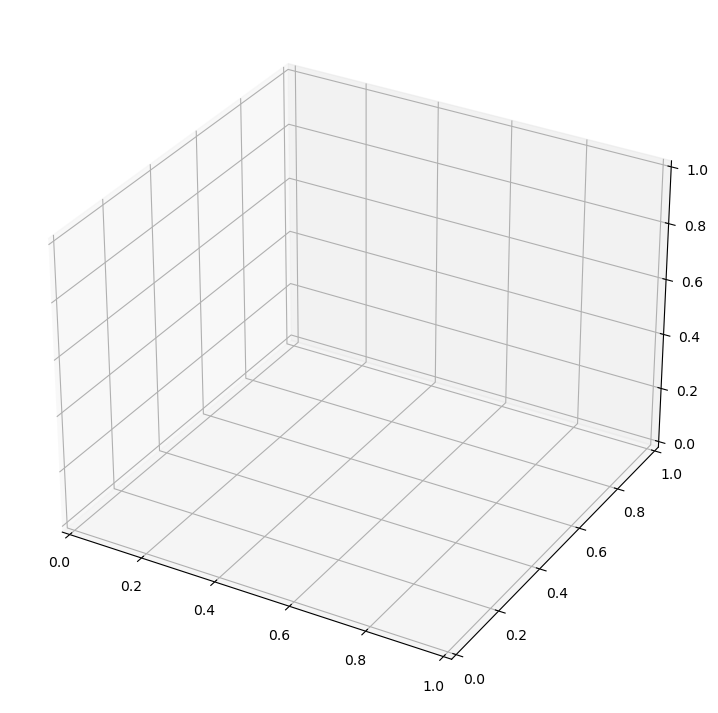

In [12]:
# Creating 3D figure:
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 

# Creating color map 
my_cmap = plt.get_cmap('hot') 

# Creating plot 
surf = ax.plot_surface(test_in_t_constant_mu[:,0:1].detach().numpy(), test_in_t_constant_mu[:,1:2].detach().numpy(), test_predicted.detach().numpy(), cmap = my_cmap, edgecolor ='none') 

fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 5) 

ax.set_title('Surface plot based on Dataset') 
plt.xlabel("x")
plt.ylabel("t")
#plt.zlabel("u")

# show plot 
plt.show() 

## Initialization weights

In [33]:
import torch
import torch.nn as nn
class LeNet300(nn.Module):
    def __init__(self):
        super(LeNet300, self).__init__()
        
        # Define layers-
        self.fc1 = nn.Linear(in_features = 2, out_features = 8)
        self.fc2 = nn.Linear(in_features = 8, out_features = 8)
        self.output = nn.Linear(in_features = 8, out_features = 1)
        
        self.weights_initialization()
    
    
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        return self.output(out)
    
    
    def weights_initialization(self):
        '''
        When we define all the modules such as the layers in '__init__()'
        method above, these are all stored in 'self.modules()'.
        We go through each module one by one. This is the entire network,
        basically.
        '''
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

In [34]:
mask_model = LeNet300()
mask_model

LeNet300(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [41]:
for layer in mask_model.state_dict():
    print(layer)
    #print(torch.ones_like(mask_model.state_dict()[layer].data))
    mask_model.state_dict()[layer].data.fill_(1)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
output.weight
output.bias


In [42]:
mask_model.state_dict()['fc1.weight']

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [35]:
with torch.no_grad():
    for layer in mask_model.state_dict():
        print(layer)
        #print(torch.ones_like(mask_model.state_dict()[layer].data))
        mask_model.state_dict()[layer].data.fill_(1)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
output.weight
output.bias


In [40]:
mask_model.state_dict()['fc1.weight']

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [38]:
mask_model.state_dict()['fc1.bias'].size()

torch.Size([8])

In [26]:
torch.manual_seed(123)

In [28]:
pt_tensor_empty_ex = torch.Tensor(2, 4, 6)
print(pt_tensor_empty_ex)

tensor([[[ 5.7704e-37,  3.0676e-41,  5.2959e-37,  3.0676e-41,  1.1210e-43,
           0.0000e+00],
         [ 1.1210e-43,  0.0000e+00,  6.7856e+16,  3.0680e-41,  1.1771e-43,
           6.8664e-44],
         [ 7.0065e-44,  8.1275e-44,  7.4269e-44,  6.8664e-44,  8.1275e-44,
           7.2868e-44],
         [ 7.2868e-44,  6.4460e-44,  7.4269e-44,  7.8473e-44,  7.9874e-44,
           1.2612e-43]],

        [[ 2.2421e-43,  0.0000e+00,  2.4803e-43,  0.0000e+00,  5.2959e-37,
           3.0676e-41],
         [ 5.7704e-37,  3.0676e-41, -6.4320e+37,  3.0674e-41,  2.0000e+00,
           0.0000e+00],
         [ 1.7937e-43,  0.0000e+00,  1.8077e-43,  0.0000e+00,  5.7281e-37,
           3.0676e-41],
         [ 4.3404e-37,  3.0676e-41,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00]]])


In [30]:
pt_tensor_filled_ex = pt_tensor_empty_ex.fill(12345)
print(pt_tensor_filled_ex)

AttributeError: 'Tensor' object has no attribute 'fill'

In [31]:
print(pt_tensor_empty_ex)

tensor([[[12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.]],

        [[12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.]]])
